# A Look Back at a Century of Nobel Prizes

---

Explore a dataset containing a century's worth of Nobel Laureates.

# Introduction

The Nobel Prize is an annual award for outstanding contributions to chemistry, physics, literature, medicine, peace, and economics. Our project aims to explore the Nobel Prize dataset to gain insights into the distribution and trends of Nobel Prize winners across various fields and periods. Specifically, we will include but not be limited to these questions:

- How has the distribution of Nobel Prize winners evolved over time across different fields?
- Are there any demographic or geographic patterns in Nobel Prize recognition?
- What are the most common affiliations or countries associated with Nobel laureates?


## Data preparation

### import dataset

In [ ]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.figure_factory as ff

%matplotlib inline

In [ ]:
# Connect with google drive
from google.colab import drive
drivePath = '/content/drive'
drive.mount(drivePath)

Mounted at /content/drive


In [ ]:
# Install wget
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=f257408a7c1b215a95eeb0392994b10af1cc2aaad57d4e7a6e8cdb5a5e9ba1b3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

# Setup URL and path
URL = 'https://raw.githubusercontent.com/lviiholic/lviiholic/main/nobel_laureates_data.csv'
dataPath = drivePath + '/MyDrive/Colab Notebooks/data/'

# Download the file from my github
fileName = wget.download(URL, out=dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data//nobel_laureates_data (1).csv


In [ ]:
# Read file into dataframe
Nobel = pd.read_csv(fileName)
print(type(Nobel))
Nobel.head(10)

<class 'pandas.core.frame.DataFrame'>


,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY
5,2023,chemistry,for the discovery and synthesis of quantum dots,3,1030,Louis Brus,male,1943-00-00,USA,Cleveland OH,0000-00-00,NaN,NaN,Columbia University,USA,New York NY
6,2023,chemistry,for the discovery and synthesis of quantum dots,3,1029,Moungi Bawendi,male,1961-00-00,France,Paris,0000-00-00,NaN,NaN,Massachusetts Institute of Technology (MIT),USA,Cambridge MA
7,2023,physics,for experimental methods that generate attosec...,3,1028,Anne L Huillier,female,16-08-1958,France,Paris,0000-00-00,NaN,NaN,Lund University,Sweden,Lund
8,2023,physics,for experimental methods that generate attosec...,3,1027,Ferenc Krausz,male,17-05-1962,Hungary,Mor,0000-00-00,NaN,NaN,Max Planck Institute of Quantum Optics,Germany,Garching
9,2023,physics,for experimental methods that generate attosec...,3,1026,Pierre Agostini,male,23-07-1941,Tunisia,Tunis,0000-00-00,NaN,NaN,The Ohio State University,USA,Columbus OH


In [ ]:
# Drop unnecessary columns for analytical purposes
nobel = Nobel.drop(columns=['laureateID','bornCity','died','diedCountry','diedCity','organizationCity'])

### data cleaning

In the original dataset, there are four date formats in the attribute of born. The non-uniform date format will cause a lot of trouble to data processing in the subsequent visualization. Therefore, we use the "try... except..." command to change the date format of the dataset to the "year-month-day" format and then use the "split" statement, leaving only the year value, to remove redundant information.

In [ ]:
# Check the data types and view the first ten rows of the table
print(type(nobel))
nobel.head(10)

<class 'pandas.core.frame.DataFrame'>


,year,category,motivation,prizeShare,fullName,gender,born,bornCountry,organizationName,organizationCountry
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,Katalin Kariko,female,17-01-1955,Hungary,Szeged University,Hungary
1,2023,economics,for having advanced our understanding of women...,1,Claudia Goldin,female,1946-00-00,USA,Harvard University,USA
2,2023,peace,for her fight against the oppression of women ...,1,Narges Mohammadi,female,21-04-1972,Iran,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,Jon Fosse,male,29-09-1959,Norway,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,Alexei Ekimov,male,1945-00-00,Russia,Nanocrystals Technology Inc.,USA
5,2023,chemistry,for the discovery and synthesis of quantum dots,3,Louis Brus,male,1943-00-00,USA,Columbia University,USA
6,2023,chemistry,for the discovery and synthesis of quantum dots,3,Moungi Bawendi,male,1961-00-00,France,Massachusetts Institute of Technology (MIT),USA
7,2023,physics,for experimental methods that generate attosec...,3,Anne L Huillier,female,16-08-1958,France,Lund University,Sweden
8,2023,physics,for experimental methods that generate attosec...,3,Ferenc Krausz,male,17-05-1962,Hungary,Max Planck Institute of Quantum Optics,Germany
9,2023,physics,for experimental methods that generate attosec...,3,Pierre Agostini,male,23-07-1941,Tunisia,The Ohio State University,USA


In [ ]:
# Convert all date strings of 'born' to 'YYYY-MM-DD' format
from datetime import datetime

def convert_to_yyyy_mm_dd(date_str):
    date_formats = ['%d-%m-%Y', '%d/%m/%Y', '%Y-%m-%d', '%Y-00-00']

    for format_str in date_formats:
        try:
            date_obj = datetime.strptime(date_str, format_str)
            return date_obj.strftime('%Y-%m-%d')
        except ValueError:
            pass

    # Return None if the date format is not recognized
    return None

# Apply the date conversion function to the 'born' column in the 'nobel' DataFrame
nobel['born'] = nobel['born'].apply(convert_to_yyyy_mm_dd)

In [ ]:
nobel.head(10)

,year,category,motivation,prizeShare,fullName,gender,born,bornCountry,organizationName,organizationCountry
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,Katalin Kariko,female,1955-01-17,Hungary,Szeged University,Hungary
1,2023,economics,for having advanced our understanding of women...,1,Claudia Goldin,female,1946-01-01,USA,Harvard University,USA
2,2023,peace,for her fight against the oppression of women ...,1,Narges Mohammadi,female,1972-04-21,Iran,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,Jon Fosse,male,1959-09-29,Norway,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,Alexei Ekimov,male,1945-01-01,Russia,Nanocrystals Technology Inc.,USA
5,2023,chemistry,for the discovery and synthesis of quantum dots,3,Louis Brus,male,1943-01-01,USA,Columbia University,USA
6,2023,chemistry,for the discovery and synthesis of quantum dots,3,Moungi Bawendi,male,1961-01-01,France,Massachusetts Institute of Technology (MIT),USA
7,2023,physics,for experimental methods that generate attosec...,3,Anne L Huillier,female,1958-08-16,France,Lund University,Sweden
8,2023,physics,for experimental methods that generate attosec...,3,Ferenc Krausz,male,1962-05-17,Hungary,Max Planck Institute of Quantum Optics,Germany
9,2023,physics,for experimental methods that generate attosec...,3,Pierre Agostini,male,1941-07-23,Tunisia,The Ohio State University,USA


Extract the year from a date using str.split()

In [ ]:
# Retain only the year in the date of 'born'
nobel['born'] = nobel['born'].str.split('-').str[0]

In [ ]:
nobel.head(10)

,year,category,motivation,prizeShare,fullName,gender,born,bornCountry,organizationName,organizationCountry
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,Katalin Kariko,female,1955,Hungary,Szeged University,Hungary
1,2023,economics,for having advanced our understanding of women...,1,Claudia Goldin,female,1946,USA,Harvard University,USA
2,2023,peace,for her fight against the oppression of women ...,1,Narges Mohammadi,female,1972,Iran,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,Jon Fosse,male,1959,Norway,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,Alexei Ekimov,male,1945,Russia,Nanocrystals Technology Inc.,USA
5,2023,chemistry,for the discovery and synthesis of quantum dots,3,Louis Brus,male,1943,USA,Columbia University,USA
6,2023,chemistry,for the discovery and synthesis of quantum dots,3,Moungi Bawendi,male,1961,France,Massachusetts Institute of Technology (MIT),USA
7,2023,physics,for experimental methods that generate attosec...,3,Anne L Huillier,female,1958,France,Lund University,Sweden
8,2023,physics,for experimental methods that generate attosec...,3,Ferenc Krausz,male,1962,Hungary,Max Planck Institute of Quantum Optics,Germany
9,2023,physics,for experimental methods that generate attosec...,3,Pierre Agostini,male,1941,Tunisia,The Ohio State University,USA


In [ ]:
# Change the type of 'year' and 'born' from object to int, facilitating subsequent calculation
nobel['year'] = nobel['year'].astype(int)
nobel['born'] = nobel['born'].astype(int)

# Part 1: Overview of the Nobel Prize dataset

## Basic Nobel Prize Statistics

In [ ]:
nobel.shape

(1000, 10)

In [ ]:
# Get name of each columns
nobel.columns

Index(['year', 'category', 'motivation', 'prizeShare', 'fullName', 'gender',
       'born', 'bornCountry', 'organizationName', 'organizationCountry'],
      dtype='object')

In [ ]:
nobel.info

<bound method DataFrame.info of      year    category                                         motivation  \
0    2023    medicine  for their discoveries concerning nucleoside ba...   
1    2023   economics  for having advanced our understanding of women...   
2    2023       peace  for her fight against the oppression of women ...   
3    2023  literature  for his innovative plays and prose which give ...   
4    2023   chemistry    for the discovery and synthesis of quantum dots   
..    ...         ...                                                ...   
995  1901       peace  for his lifelong work for international peace ...   
996  1901       peace  for his humanitarian efforts to help wounded s...   
997  1901    medicine  for his work on serum therapy especially its a...   
998  1901   chemistry  in recognition of the extraordinary services h...   
999  1901     physics  in recognition of the extraordinary services h...   

     prizeShare                fullName  gender  born  

## Number of Winners in Different Categories




In [ ]:
# Check category
categoryCount = nobel.category.value_counts()

# Recreate a dataframe of category and its count
Category = categoryCount.reset_index()
Category.columns = ['category', 'count']
Category

,category,count
0,medicine,227
1,physics,225
2,chemistry,194
3,peace,141
4,literature,120
5,economics,93


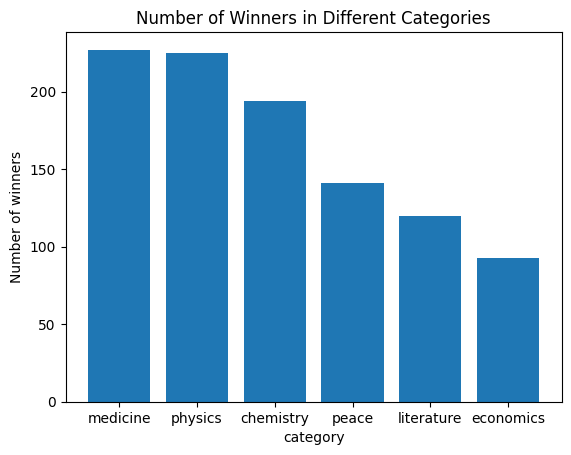

In [ ]:
# Plot a bar chart according to number of winners in different fields
plt.bar(Category['category'], Category['count'])
plt.xlabel('category')
plt.ylabel('Number of winners')
plt.title('Number of Winners in Different Categories')
plt.show()

The bar chart clearly shows that the field of medicine has the most winners with 227, while economics has the fewest with 93. Meanwhile, physics had the second-highest number of winners, followed by chemistry, peace, and literature.

## Number of Awards Awarded Per Year

In [ ]:
# Check year
yearCount = nobel.year.value_counts()

# Recreate a dataframe of year and its count
Year = yearCount.reset_index()
Year.columns = ['year', 'count']
Year = Year.sort_values(by='year')
Year

,year,count
88,1901,6
76,1902,7
75,1903,7
81,1904,6
98,1905,5
...,...,...
1,2019,14
24,2020,12
12,2021,13
2,2022,14


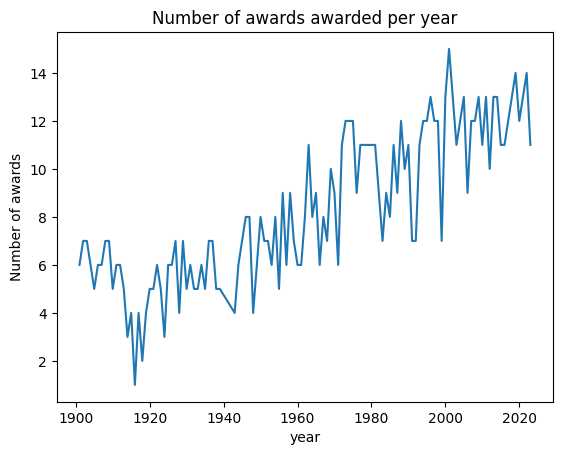

In [ ]:
# Plot a line graph of number of awarded per year
plt.plot(Year['year'], Year['count'])
plt.xlabel('year')
plt.ylabel('Number of awards')
plt.title('Number of awards awarded per year')
plt.show()

The line graph demonstrates that the number of awards awarded grew apparently with some sustainable fluctuations from 6 to the least, with the number of 1 between 1900 and 1916, followed by a fluctuant increase in the next 107 years. The highest number of awards was 15 in 2005. Overall, the number of prizes awarded shows an upward trend.

## Distribution of Nobel Prizes in Shared Laureates

In [ ]:
# Check prize share
PSCount = nobel.prizeShare.value_counts()

# Recreate a dataframe of prize share and its count
Share_of_Prize = PSCount.reset_index()
Share_of_Prize.columns = ['prizeShare', 'count']
Share_of_Prize

,prizeShare,count
0,1,358
1,2,331
2,3,237
3,4,74


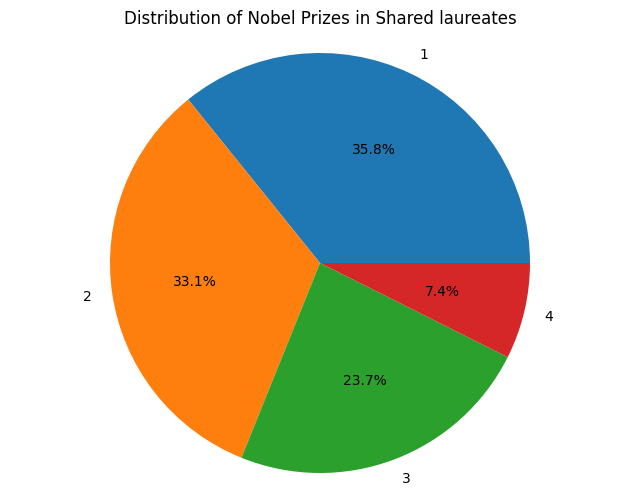

In [ ]:
# Extracting data for the pie chart
labels = Share_of_Prize['prizeShare']
sizes = Share_of_Prize['count']

# Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set the title of the pie chart
plt.title('Distribution of Nobel Prizes in Shared laureates')
plt.show()

Almost 1/3 of the Nobel prizes are awarded to a single person, and 2/3 of the Nobel prizes are shared by more than one person.

### How has the number of shared Nobel Prizes changed over the years?

In [ ]:
Share_of_Prizebyyear = nobel[['prizeShare', 'year']]

# Calculating the count for each prize share
counts = Share_of_Prizebyyear.groupby(['year', 'prizeShare']).size().reset_index(name='count')

# Extracting data for the stacked bar chart
x = counts['year'].unique()  # Get unique years
prizeShares = [1, 2, 3, 4]

# Reindexing the counts DataFrame to include all years and prize shares
counts = counts.pivot(index='year', columns='prizeShare', values='count')
counts = counts.reindex(columns=prizeShares).fillna(0).astype(int).reset_index()

# Creating the stacked bar chart
fig = go.Figure()
for prizeShare in prizeShares:
    fig.add_trace(go.Bar(name=prizeShare, x=counts['year'], y=counts[prizeShare]))

fig.update_layout(barmode='stack', title='Number of Shared Nobel Prizes over the Years')
fig.show()

The number of single Nobel Prize winners has changed a bit. If we take the 1950s as a boundary, we will find that before the 1950s, the number of people who won the Nobel Prize alone was relatively high. However, after the 1950s, the number of people who won the Nobel Prize shared by two to four people increased significantly. In the 21st century, it is less for a single person to win a Nobel Prize.

# Part 2: Analysis of Nobel Laureates

What characteristics do the prize winners have? Who won? Who got snubbed?

## Gender Ratio of Nobel Laureates Over the Years

In [ ]:
# Check gender; 'org' is abbreviation of organization
genderCount = nobel.gender.value_counts()

# Recreate a dataframe of gender and its count
Gender = genderCount.reset_index()
Gender.columns = ['gender', 'count']
Gender

,gender,count
0,male,905
1,female,65
2,org,30


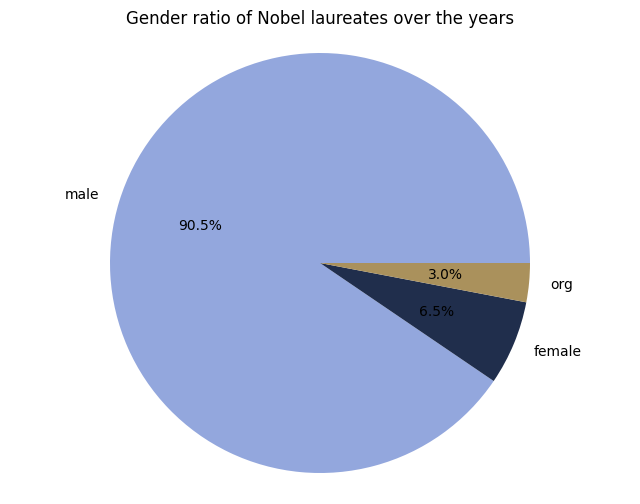

In [ ]:
# Extracting data for the pie chart
labels = Gender['gender']
sizes = Gender['count']

# Creating a pie chart
plt.figure(figsize=(8, 6))
colors = ['#93a7dd','#202e4c','#aa915c']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set the title of the pie chart
plt.title('Gender ratio of Nobel laureates over the years')
plt.show()

The pie chart illustrates that most winners are males. The percentage of male winners is 90.5%, followed by 6.5% of females and 3.0% of organizations.

In [ ]:
# Sorting the Nobel DataFrame based on the 'year' column in ascending order
sorted_df = nobel.sort_values('year')

# Filtering the DataFrame to get the first occurrence of a female winner
first_female_winner = sorted_df[sorted_df['gender'] == 'female'].iloc[0]
first_female_winner

year                                                                1903
category                                                         physics
motivation             in recognition of the extraordinary services t...
prizeShare                                                             4
fullName                                                     Marie Curie
gender                                                            female
born                                                                1867
bornCountry                                                       Poland
organizationName                                                     NaN
organizationCountry                                                  NaN
Name: 986, dtype: object

In [ ]:
nobelFemale = nobel[nobel['fullName'] == 'Marie Curie']
nobelFemale

,year,category,motivation,prizeShare,fullName,gender,born,bornCountry,organizationName,organizationCountry
937,1911,chemistry,in recognition of her services to the advancem...,1,Marie Curie,female,1867,Poland,Sorbonne University,France
986,1903,physics,in recognition of the extraordinary services t...,4,Marie Curie,female,1867,Poland,NaN,NaN


The first female to win a Nobel Prize was Marie Curie in 1903, who was awarded the Nobel Prize for the second time in 1911.

### Distribution of Laureates by Age Group

Calculate the age of each prize winner(exclude organization)

In [ ]:
# Remove the rows whose gender is organization, since the age of organization is meaningless for the next visualization
nobelHuman = nobel[nobel['gender']!= 'org']
nobelHuman

,year,category,motivation,prizeShare,fullName,gender,born,bornCountry,organizationName,organizationCountry
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,Katalin Kariko,female,1955,Hungary,Szeged University,Hungary
1,2023,economics,for having advanced our understanding of women...,1,Claudia Goldin,female,1946,USA,Harvard University,USA
2,2023,peace,for her fight against the oppression of women ...,1,Narges Mohammadi,female,1972,Iran,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,Jon Fosse,male,1959,Norway,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,Alexei Ekimov,male,1945,Russia,Nanocrystals Technology Inc.,USA
...,...,...,...,...,...,...,...,...,...,...
995,1901,peace,for his lifelong work for international peace ...,2,Frederic Passy,male,1822,France,NaN,NaN
996,1901,peace,for his humanitarian efforts to help wounded s...,2,Henry Dunant,male,1828,Switzerland,NaN,NaN
997,1901,medicine,for his work on serum therapy especially its a...,1,Emil von Behring,male,1854,Poland,Marburg University,Germany
998,1901,chemistry,in recognition of the extraordinary services h...,1,Jacobus H. van 't Hoff,male,1852,the Netherlands,Berlin University,Germany


In [ ]:
# Calculate age of winners when they get nobel prize
nobelHuman['ages'] = nobelHuman['year'] - nobelHuman['born']
nobelHuman_age = nobelHuman.loc[:,['ages', 'fullName']]
nobelHuman_age

,ages,fullName
0,68,Katalin Kariko
1,77,Claudia Goldin
2,51,Narges Mohammadi
3,64,Jon Fosse
4,78,Alexei Ekimov
...,...,...
995,79,Frederic Passy
996,73,Henry Dunant
997,47,Emil von Behring
998,49,Jacobus H. van 't Hoff


In [ ]:
# Extract details of age
nobelHuman_age.describe()

,ages
count,970.000000
mean,60.256701
std,12.634624
min,17.000000
25%,51.000000
50%,60.500000
75%,69.000000
max,97.000000


Oldest and youngest winners so far

In [ ]:
max_min_df = nobelHuman[(nobelHuman['ages'] == 17) | (nobelHuman['ages'] == 97)]
max_min_df

,year,category,motivation,prizeShare,fullName,gender,born,bornCountry,organizationName,organizationCountry,ages
57,2019,chemistry,for the development of lithium-ion batteries,3,John Goodenough,male,1922,Germany,University of Texas,USA,97
114,2014,peace,for their struggle against the suppression of ...,2,Malala Yousafzai,female,1997,Pakistan,NaN,NaN,17


In [ ]:
# Extracting data for the distribution plot
ages = nobelHuman['ages'].dropna()
colors = ['#637398']
# Creating a distribution plot
fig = ff.create_distplot([ages], ['Age Distribution'])

# Setting the title and color of the distribution plot
fig.update_traces(marker=dict(color='#637398'))
fig.update_layout(title='Distribution of Laureates by Age Group')

# Displaying the distribution plot
fig.show()

The age distribution of all the winners displayed a normal distribution, mainly clustered in the range of 45-75 years old, with the average age of the winners being 60 years old.

## Distribution of Laureates by Top 10 Organizations
Which university has won the most Nobel Prizes?

In [ ]:
# Check organization name
orgNameCount = nobel.organizationName.value_counts()

# Recreate a dataframe of organization and its count
orgName = orgNameCount.reset_index()
orgName.columns = ['organizationName', 'count']
orgTop10 = orgName.head(10)
orgTop10

,organizationName,count
0,University of California,36
1,Harvard University,28
2,Massachusetts Institute of Technology (MIT),22
3,Stanford University,22
4,University of Chicago,19
5,Columbia University,18
6,California Institute of Technology (Caltech),17
7,Princeton University,17
8,University of Cambridge,17
9,Rockefeller University,13


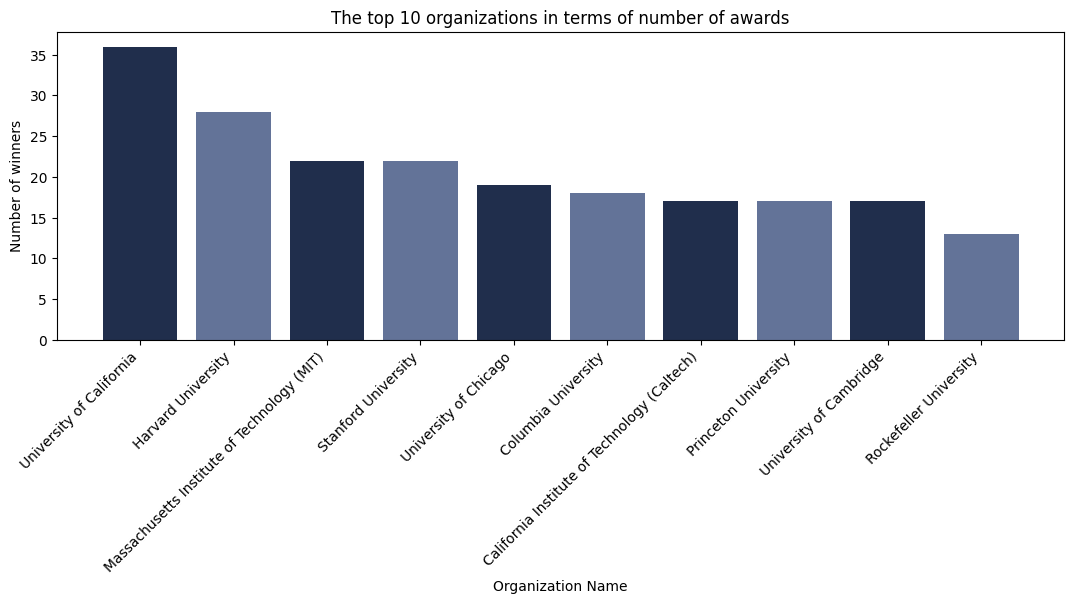

In [ ]:
# Creating a bar plot to visualize the top 10 organizations in terms of the number of awards
#setting colors
colors=['#202e4c','#637398']
# Setting figure size to make the plot wider
plt.figure(figsize=(13, 4))
plt.bar(orgTop10['organizationName'], orgTop10['count'],color=colors)
plt.xlabel('Organization Name')
plt.ylabel('Number of winners')
#rotating the X label
plt.xticks(rotation=45, ha='right')
plt.title('The top 10 organizations in terms of number of awards')
plt.show()

This bar chart shows the top ten organizations with the highest number of prizes awarded. Obviously, the University of California won the most prizes with 36, followed by Harvard University with 28. Meanwhile, Stanford University and the University of Chicago are tied for third with 22 Nobel prizes each. In conclusion, most Nobel laureates graduated from American universities.

## Distribution of Nobel Prize Winners by Country and Year

The first Nobel Prize was handed out in 1901, and at that time the prize was Eurocentric and male-focused, but how it changed nowadays?

Let's find out!

In [ ]:
# Group data by year and country and count the number of winners
winners_by_year_country = nobelHuman.groupby(['year', 'bornCountry']).size().reset_index(name='count')

# Pivot the data to have countries as columns and years as index
pivot_table = winners_by_year_country.pivot(index='year', columns='bornCountry', values='count').fillna(0)

# Get the list of countries for the legend
legend_countries = pivot_table.columns.tolist()

# Create stacked bar chart
data = []
for country in legend_countries:
    data.append(go.Bar(x=pivot_table.index, y=pivot_table[country], name=country))

# Set layout
layout = go.Layout(
    title='Distribution of Nobel Prize Winners by Country and Year',
    barmode='stack',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Winners')
)

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show the plot
fig.show()

Over the years, the United States has emerged as a dominant force in the Nobel Prize, consistently producing a significant number of winners across different categories.

## Distribution of Laureates by Country in Map

Which country gets it most often?

In [ ]:
# Check born country
bornCountryCount = nobel.bornCountry.value_counts()

# Recreate a dataframe of born country and its count
bornCountry = bornCountryCount.reset_index()
bornCountry.columns = ['bornCountry', 'count']
bornCountry

,bornCountry,count
0,USA,292
1,United Kingdom,90
2,Germany,84
3,France,61
4,Sweden,30
...,...,...
83,Myanmar,1
84,Yemen,1
85,Nigeria,1
86,Taiwan,1


In [ ]:
# Get data on the winners in each country
country_counts = nobel['bornCountry'].value_counts().reset_index()
country_counts.columns = ['bornCountry', 'Count']

# Create mapdata
map_data = pd.DataFrame({'bornCountry': country_counts['bornCountry'], 'Count': country_counts['Count']})

# Use choropleth function
fig = px.choropleth(map_data, locations='bornCountry', locationmode='country names', color='Count',
                    color_continuous_scale='YlGnBu', range_color=(0, map_data['Count'].max()),
                    title='Nobel Prize Winners by Country')

fig.show()

The dominance of the United States in the Nobel Prize, with 292 laureates, reflects its historical and ongoing commitment to scientific advancement. Followed by the UK and Germany with 90 and 84 respectively. The map reveals that, apart from the United States, Western European countries, including France, Denmark, Sweden, and Italy, are notable regions with a significant concentration of Nobel Prize laureates.

## Distribution of Laureates by Country and Category

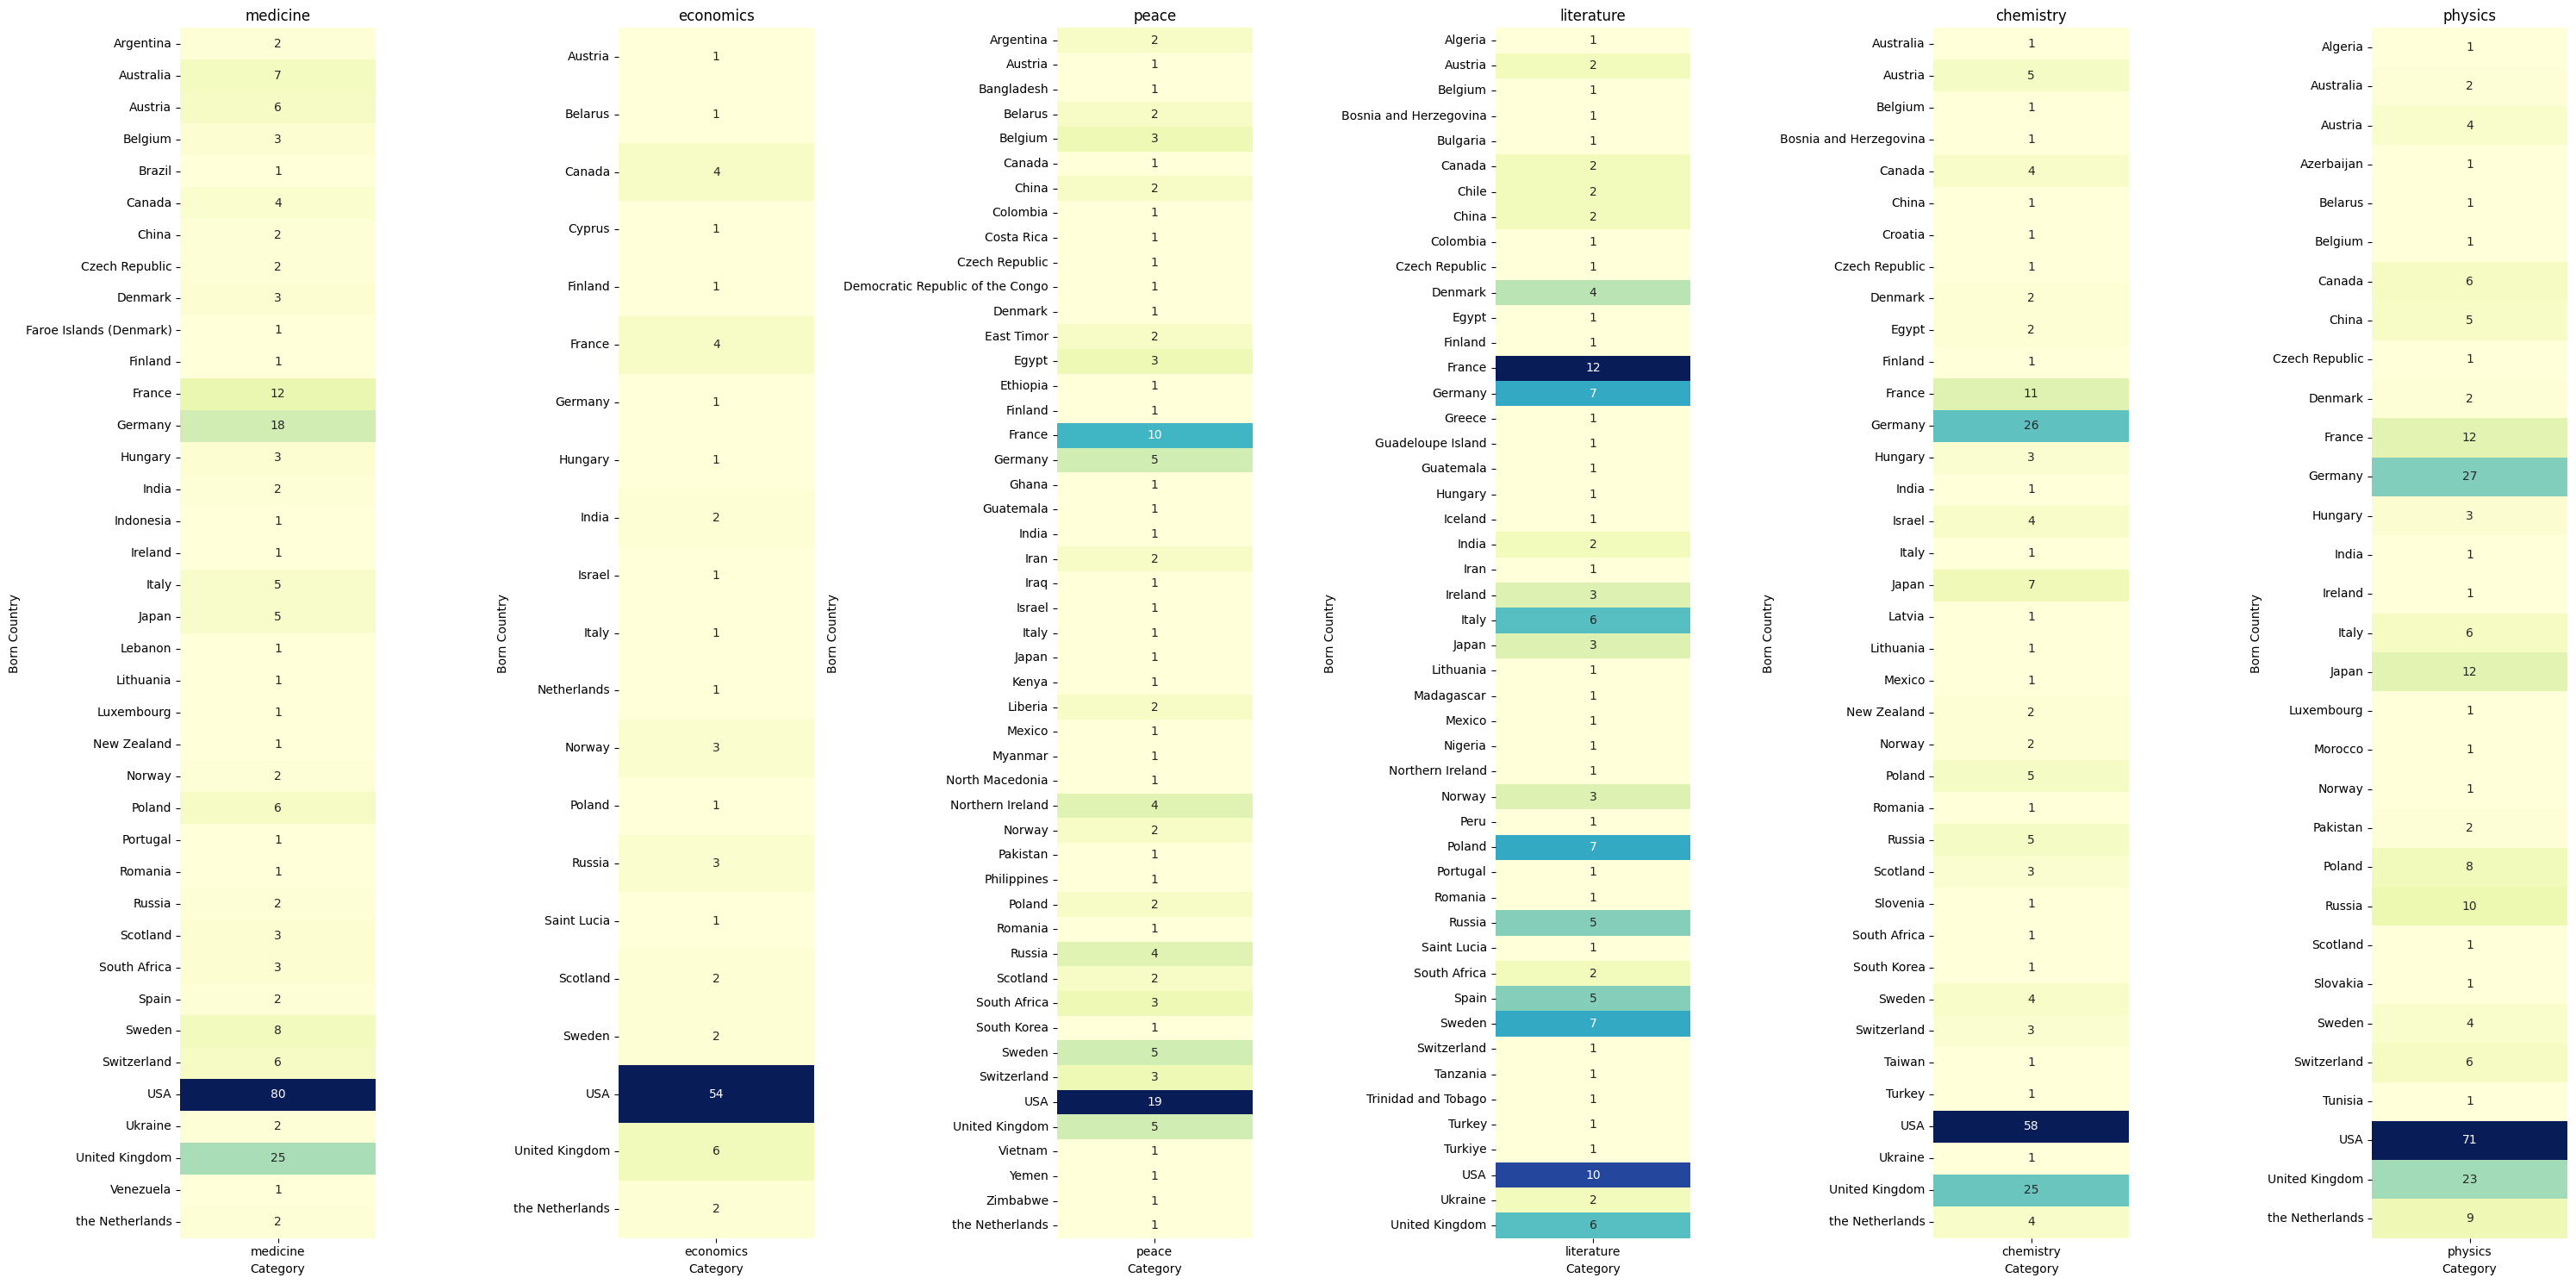

In [ ]:
categories = nobel['category'].unique()

# Setting up the subgraph layout
fig = plt.figure(figsize=(30, 15))
gs = gridspec.GridSpec(1, 6, figure=fig)

# Iterate over ecah category
for i, category in enumerate(categories):

    # Get data from category
    category_data = nobel[nobel['category'] == category]

    # Generate heat map data in tabular form
    category_map = pd.crosstab(category_data['bornCountry'], category_data['category'])

    # Setting the Submap Position
    ax = fig.add_subplot(gs[i])

    # Generate heatmap
    sns.heatmap(category_map, ax=ax, cmap='YlGnBu', annot=True, cbar=False)

    ax.set_title(category)
    ax.set_xlabel('Category')
    ax.set_ylabel('Born Country')

plt.tight_layout()
plt.show()

Categorized by the countries and fields of the Nobel laureates, in the other five fields except for France, which occupies the top spot in terms of the number of laureates in literature, the USA is unassailably dominant, with the number of laureates far ahead of the second place in all of them. The UK, France, and Germany are also more impressive in the number of prizes awarded in the six fields.

At the same time, the research in the field of literature is blossoming, with more balanced awards from Germany, Italy, Poland, Sweden, and the United Kingdom. Although many countries have successive award records in peace, the The United States and France still dominate.

Of the six fields, the economy has the smallest number of award-winning countries. The United States tops the list by a wide margin.

# Part 3: Analysis of Nobel Prizes in Different Categories

## Number of Awards Awarded Annually in Different Subjects

please select the field
A.Arts
B.Science
A


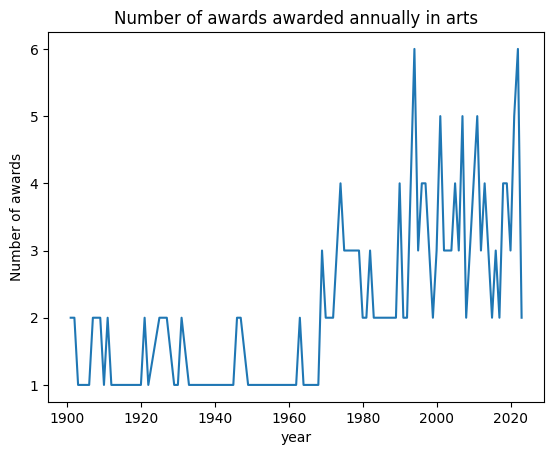

In [ ]:
# Requesting user input to select a field: Arts or Science
selected_field=input('''please select the field
A.Arts
B.Science
''')

# Check if the selected field is 'A' for Arts
if selected_field=='A':

  # Filter the Nobel DataFrame for categories related to Arts
  selected_df = nobel[nobel['category'].isin(['peace','lireature','economics'])]

  # Group the data by year and count the number of awards per year
  Field = selected_df.groupby('year').size().reset_index()
  Field.columns = ['year', 'count']

  # Plotting the number of awards given annually in Arts
  plt.plot(Field['year'], Field['count'])
  plt.xlabel('year')
  plt.ylabel('Number of awards')
  plt.title('Number of awards awarded annually in arts')
  plt.show()

# If no field is selected, default to Science
elif selected_field=='B':

  # Filter the Nobel DataFrame for categories related to Science
  selected_df = nobel[nobel['category'].isin(['chemistry','physics','medicine'])]

  # Group the data by year and count the number of awards per year
  Field = selected_df.groupby('year').size().reset_index()
  Field.columns = ['year', 'count']

  # Plotting the number of awards given annually in Science
  plt.plot(Field['year'], Field['count'])
  plt.xlabel('year')
  plt.ylabel('Number of awards')
  plt.title('Number of awards awarded annually in science')
  plt.show()

# If an invalid field is entered
else:
  print('no such field')

We find that the number of Nobel Prize winners in the sciences has all been rising overall year by year, while the number of winners in the arts has been relatively flat but also rising year by year after 1970.

## Distribution of Laureates by Age and Category
Age differences between prize categories

<Axes: xlabel='category', ylabel='ages'>

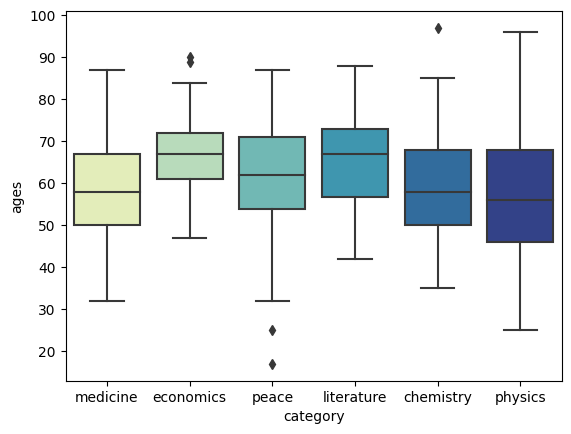

In [ ]:
# Creating a boxplot using Seaborn to visualize the distribution of ages across different Nobel Prize categories
sns.boxplot(x="category", y="ages", data=nobelHuman, palette='YlGnBu')

All the laureates are clustered between 50 and 70 in these six fields. One of them, John B. Goodenough, in the field of chemistry, is the oldest recipient of the Nobel Prize to date. In the field of economics, two winners are nearly 90 years old. Malala Yousafzai, a 17-year-old girl from Pakistan, is the youngest recipient of the Nobel Prize.

##Change in Age over Different Years by Category

In [ ]:
# Calculate average age for each category
average_age_by_category = nobelHuman.groupby('category')['ages'].mean().reset_index()
average_age_by_category

,category,ages
0,chemistry,59.128866
1,economics,66.935484
2,literature,64.991667
3,medicine,58.696035
4,peace,60.774775
5,physics,57.262222


In [ ]:
# Extracting data for the line chart
age_by_year = nobelHuman[['year', 'category', 'ages']].dropna()

# Creating the subplots
fig = sp.make_subplots(rows=2, cols=3, subplot_titles=list(nobelHuman['category'].unique()))

# Creating the line charts for each category and adding average line
for i, category in enumerate(nobelHuman['category'].unique()):
    category_data = age_by_year[age_by_year['category'] == category]
    fig.add_trace(go.Scatter(x=category_data['year'], y=category_data['ages'], mode='lines', name='Age'), row=(i // 3) + 1, col=(i % 3) + 1)

    # Calculating average age for the category
    average_age = category_data['ages'].mean()

    # Adding average line
    fig.add_trace(go.Scatter(x=category_data['year'], y=[average_age] * len(category_data['year']), mode='lines', name='Average Age'), row=(i // 3) + 1, col=(i % 3) + 1)

# Setting the title and axis labels for each subplot
for i, category in enumerate(nobelHuman['category'].unique()):
    fig.update_xaxes(title_text='Year', row=(i // 3) + 1, col=(i % 3) + 1)
    fig.update_yaxes(title_text='Age', row=(i // 3) + 1, col=(i % 3) + 1)

# Updating the layout of the subplots
fig.update_layout(title='Change in Age over Different Years by Category', showlegend=True)

# Displaying the subplots
fig.show()

These line plots depicting the age of winners across different fields reveal a discernible trend, indicating that laureates in Medicine, Chemistry, and Physics tend to be of advanced age. This observation suggests that scientists in these disciplines typically require an extended duration to attain noteworthy outcomes. And the Peace Nobel Prize winners have some young individuals coming up.

## Word Cloud of Motivation by Category

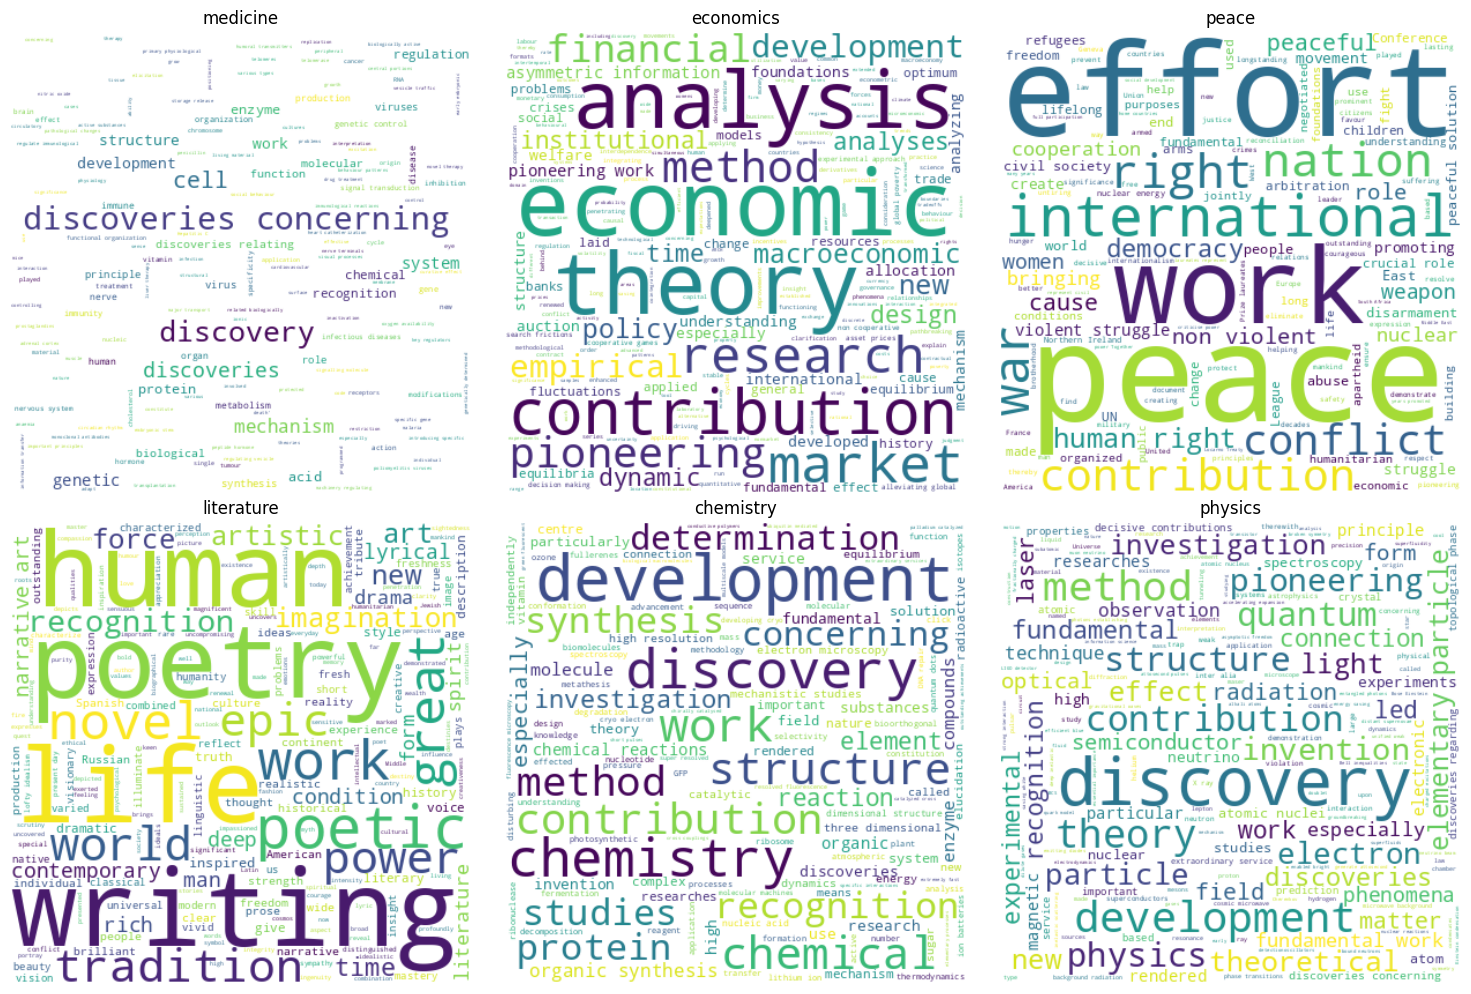

In [ ]:
from wordcloud import WordCloud
categories = nobel['category'].unique()

# Setting up the subgraph layout
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axs array from a 2D array to a 1D array for iterating through
axs = axs.flatten()

# Iterate over each category
for i, category in enumerate(categories):
    # Getting data from category
    category_data = nobel[nobel['category'] == category]

    # Concatenates the text in the motivation column into string
    text = ' '.join(category_data['motivation'].dropna())

    # create wordcloud
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate(text)

    # plot subgraph
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(category)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Through the word cloud diagram, the frequency of "discovery", "contribution" and "development" in the six fields is relatively high, which shows that most of the Nobel Prize winners are innovative discoveries that have favorably promoted the forward development of the corresponding fields in human society.

However, each field also has its keywords, such as "peace" and "effort" in the field of peace, while in the field of literature, "writing," "life," "poetry," and "human" are the words that are mentioned repeatedly.

It is worth noting that the word cloud in medicine is more dispersed, and each word is more minor, possibly due to the large number of research branches and small sample size.


# Conclusion

Almost everything is changing in the fields of science and humanitarian endeavors, but one thing has not changed: **Nobel Prize winners are still overwhelmingly male, American and European.** Although Nobel Prize winners with these characteristics are overwhelmingly dominant in the scientific field, as the diversity of winners increases, it inspires humankind to continue to innovate on the path of intellectual discovery.


Through data analysis and visualization, we summarize several distinct patterns:

- Over time, there has been a steady rise in the number of awards, accompanied by a decline in the proportion of individual winners and a corresponding increase in the proportion of shared awards involving multiple individuals.

- The age distribution of all the winners displayed a normal distribution, with a concentration between 45-75 years old and an average age of 60. The age of Nobel laureates in Medicine, Chemistry, and Physics tends to be higher, suggesting that significant achievements in these disciplines often require a longer duration of research.

- John B. Goodenough, the oldest recipient of the Nobel Prize to date, received the award in the field of Chemistry. In contrast, Malala Yousafzai, a 17-year-old girl from Pakistan, became the youngest recipient of the Nobel Prize.

- The United States has consistently dominated the Nobel Prize, particularly in fields other than literature where France leads. The UK, France, and Germany also have notable contributions. American universities, especially the University of California, have produced the most Nobel laureates. This dominance spans across regions and time.

- The word cloud analysis shows common themes of "discovery," "contribution," and "development" across the six fields. However, each field has its specific keywords, such as "peace" and "effort" in Peace, and "writing," "life," "poetry," and "human" in Literature. Medicine exhibits a more dispersed word cloud due to its diverse research branches and smaller sample size.